# Trigonometric fit using hyperopt

https://github.com/fmfn/BayesianOptimization<br>
https://github.com/hyperopt/hyperopt

In [1]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt 
from sklearn.metrics import mean_squared_error, r2_score
from hyperopt import hp, tpe, Trials, fmin
import time
import os

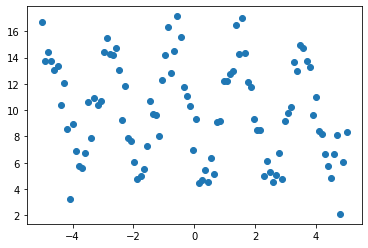

In [2]:
seed = 12345512
np.random.seed(seed)

n = 100
x_data = np.linspace(-5, 5, num= n)
y_data = 10 + 5 * np.cos(3 * x_data + 2) + 1.5 * np.random.normal(size=n)
plt.scatter(x_data, y_data)

In [3]:
# random split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)


In [4]:
def objective(a0, a1, w, f):
    """Objective function to minimize"""
    return np.mean((a0+ a1 * np.cos(w*X_train + f) - y_train)**2)

In [5]:
def objective2(args):
    return objective(*args)

## hyperopt

In [6]:
space = [hp.uniform('a0', 5, 15),
         hp.uniform('a1', 0, 10), 
         hp.uniform('w', 0, 10), 
         hp.uniform('f', -np.pi, np.pi)]

tpe_algo = tpe.suggest
tpe_trials = Trials()

start = time.time()
tpe_best = fmin(fn=objective2, space=space, algo=tpe_algo, trials=tpe_trials, max_evals= 500, rstate= np.random.RandomState(seed))
end = time.time()
print('Time:', end - start)

print(tpe_best)

100%|███████████████████████████████████████████████| 500/500 [00:05<00:00, 99.71trial/s, best loss: 4.387696786887203]
Time: 5.028461694717407
{'a0': 10.664612442052675, 'a1': 4.177349345897736, 'f': 1.9604950863969117, 'w': 3.106202594635621}


In [7]:
# Test
from sklearn.metrics import mean_squared_error, r2_score

ypred = tpe_best['a0']+ tpe_best['a1'] * np.cos(tpe_best['w'] * X_test + tpe_best['f'])

rmse = mean_squared_error(y_test,ypred)
r2 = r2_score(y_test,ypred)
print('mse:', rmse)
print('r2:',r2)

mse: 3.3691017228872675
r2: 0.7917787135381958


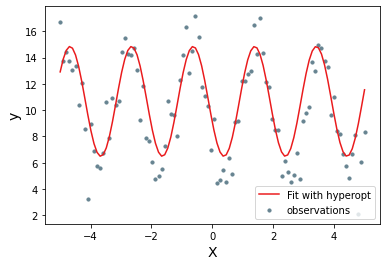

In [8]:
y = tpe_best['a0'] + tpe_best['a1'] * np.cos(tpe_best['w'] * x_data + tpe_best['f'])

fig, ax = plt.subplots()
ax.scatter(x_data, y_data, label= 'observations', color= '#678491', s=10)
ax.plot(x_data, y, label= 'Fit with hyperopt', color= '#EA1B1D')
ax.set_ylabel('y', fontsize= 14)
ax.set_xlabel('X', fontsize= 14)
plt.legend(loc='lower right')
#ax.set_title('Fit using hyperopt', fontsize= 14)
if os.path.isdir( os.path.join('..', 'images') ) is False:
    os.makedirs(os.path.join('..', 'images') )
plt.savefig('../images/hyperopt.png', bbox_inches="tight")